In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-62.593974838068696 174.85661960588624
15.889211663629695 104.84453556531804
-70.72867367820105 141.4201533655086
32.858334821489606 74.50852178078418
-4.716953041377792 -33.37024689790255
-35.57857849284435 -55.702882074273916
-15.261961328551564 -40.57209271531005
73.11064192768987 142.98684537193287
-43.316699051760715 82.90753665330982
30.103439931860564 135.25039673732977
76.67497023860619 -14.01192413820769
-14.520065493742734 165.74769210401087
84.36580076778594 -142.69601385504777
82.517230494388 70.16778189843725
-69.78476242252816 131.3710756349476
-37.18027858149205 84.74234087289636
19.134076321615524 44.98163457584826
-84.1261194208111 -54.025538378477734
60.693392841381666 91.12471960674026
-26.18149469013693 -128.74319987218888
-1.7209911317301874 -25.217610296629687
58.0485736122896 -147.1448945797955
59.07165458836471 122.04597557454974
-32.64431295622035 -49.241502798425074
39.12251177429971 -51.927629303012424
79.23842663620013 18.746617176211373
43.89137929238046 -9

In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

616

----------------------------------------------------------------------


In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the time library and the datetime module from the datetime library
import time
from datetime import datetime


In [25]:

#Create Url
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + "92c614eef514fe63272ec366bc392dad"
print(url)
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=92c614eef514fe63272ec366bc392dad
Beginning Data Retrieval     
-----------------------------


In [26]:
                                                                                                                                                                   
   # Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | jalu
Processing Record 2 of Set 1 | fort frances
Processing Record 3 of Set 1 | faya
Processing Record 4 of Set 1 | rikitea
Processing Record 5 of Set 1 | qaanaaq
Processing Record 6 of Set 1 | port elizabeth
Processing Record 7 of Set 1 | touros
Processing Record 8 of Set 1 | burgeo
Processing Record 9 of Set 1 | undory
Processing Record 10 of Set 1 | bilibino
Processing Record 11 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 12 of Set 1 | lipin bor
Processing Record 13 of Set 1 | kilindoni
Processing Record 14 of Set 1 | odweyne
Processing Record 15 of Set 1 | barrow
Processing Record 16 of Set 1 | sangmelima
Processing Record 17 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 18 of Set 1 | amderma
City not found. Skipping...
Processing Record 19 of Set 1 | auki
Processing Record 20 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 21 of Set 1 | hamilton
Processing Record 22 of Set 1 | myitkyi

Processing Record 36 of Set 4 | lagoa
Processing Record 37 of Set 4 | grand river south east
City not found. Skipping...
Processing Record 38 of Set 4 | batagay
Processing Record 39 of Set 4 | yarada
Processing Record 40 of Set 4 | vostok
Processing Record 41 of Set 4 | lavrentiya
Processing Record 42 of Set 4 | houlton
Processing Record 43 of Set 4 | kutum
Processing Record 44 of Set 4 | constitucion
Processing Record 45 of Set 4 | coquimbo
Processing Record 46 of Set 4 | asfi
Processing Record 47 of Set 4 | berlevag
Processing Record 48 of Set 4 | rocha
Processing Record 49 of Set 4 | camalu
Processing Record 50 of Set 4 | kruisfontein
Processing Record 1 of Set 5 | saint-pierre
Processing Record 2 of Set 5 | george
Processing Record 3 of Set 5 | vagur
Processing Record 4 of Set 5 | meulaboh
Processing Record 5 of Set 5 | paradwip
City not found. Skipping...
Processing Record 6 of Set 5 | kaitangata
Processing Record 7 of Set 5 | tungor
Processing Record 8 of Set 5 | egvekinot
Proces

Processing Record 24 of Set 8 | tabuk
Processing Record 25 of Set 8 | nuuk
Processing Record 26 of Set 8 | nome
Processing Record 27 of Set 8 | inongo
Processing Record 28 of Set 8 | zwettl
Processing Record 29 of Set 8 | kainantu
Processing Record 30 of Set 8 | dharchula
Processing Record 31 of Set 8 | idaho falls
Processing Record 32 of Set 8 | la romana
Processing Record 33 of Set 8 | acapulco
Processing Record 34 of Set 8 | vidim
Processing Record 35 of Set 8 | boa vista
Processing Record 36 of Set 8 | maxixe
Processing Record 37 of Set 8 | letlhakane
Processing Record 38 of Set 8 | shingu
Processing Record 39 of Set 8 | kaabong
Processing Record 40 of Set 8 | shakhtinsk
Processing Record 41 of Set 8 | sovetskiy
Processing Record 42 of Set 8 | chapais
Processing Record 43 of Set 8 | kahului
Processing Record 44 of Set 8 | pakala
Processing Record 45 of Set 8 | tasbuget
City not found. Skipping...
Processing Record 46 of Set 8 | muroto
Processing Record 47 of Set 8 | volchansk
Proce

Processing Record 14 of Set 12 | forbes
Processing Record 15 of Set 12 | camden
Processing Record 16 of Set 12 | yulara
Processing Record 17 of Set 12 | bati
Processing Record 18 of Set 12 | yelizovo
Processing Record 19 of Set 12 | fengcheng
Processing Record 20 of Set 12 | san quintin
Processing Record 21 of Set 12 | batken
Processing Record 22 of Set 12 | aklavik
Processing Record 23 of Set 12 | klyuchi
Processing Record 24 of Set 12 | samalaeulu
City not found. Skipping...
Processing Record 25 of Set 12 | vestmannaeyjar
Processing Record 26 of Set 12 | kiama
Processing Record 27 of Set 12 | singapore
Processing Record 28 of Set 12 | vieques
Processing Record 29 of Set 12 | sleepy hollow
Processing Record 30 of Set 12 | dzhusaly
City not found. Skipping...
Processing Record 31 of Set 12 | mezen
Processing Record 32 of Set 12 | kangaatsiaq
Processing Record 33 of Set 12 | skibbereen
Processing Record 34 of Set 12 | skiros
City not found. Skipping...
Processing Record 35 of Set 12 | z

In [48]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Jalu,29.0331,21.5482,67.96,40,0,8.34,LY,2022-12-15 21:52:24
1,Fort Frances,48.5999,-93.4003,30.16,87,100,12.44,CA,2022-12-15 21:52:24
2,Faya,18.3851,42.4509,55.51,71,82,2.73,SA,2022-12-15 21:52:24
3,Rikitea,-23.1203,-134.9692,74.26,75,97,8.08,PF,2022-12-15 21:52:25
4,Qaanaaq,77.4840,-69.3632,15.49,71,100,8.14,GL,2022-12-15 21:52:25
5,Port Elizabeth,-33.9180,25.5701,71.31,96,100,2.30,ZA,2022-12-15 21:52:26
6,Touros,-5.1989,-35.4608,78.93,75,100,11.83,BR,2022-12-15 21:52:26
7,Burgeo,47.6167,-57.6152,36.16,77,97,33.11,CA,2022-12-15 21:52:27
8,Undory,54.6085,48.3928,9.64,96,99,4.56,RU,2022-12-15 21:52:27
9,Bilibino,68.0546,166.4372,-11.87,74,95,4.25,RU,2022-12-15 21:52:28


In [53]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng",
                "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Jalu,LY,2022-12-15 21:52:24,29.0331,21.5482,67.96,40,0,8.34
1,Fort Frances,CA,2022-12-15 21:52:24,48.5999,-93.4003,30.16,87,100,12.44
2,Faya,SA,2022-12-15 21:52:24,18.3851,42.4509,55.51,71,82,2.73
3,Rikitea,PF,2022-12-15 21:52:25,-23.1203,-134.9692,74.26,75,97,8.08
4,Qaanaaq,GL,2022-12-15 21:52:25,77.4840,-69.3632,15.49,71,100,8.14
5,Port Elizabeth,ZA,2022-12-15 21:52:26,-33.9180,25.5701,71.31,96,100,2.30
6,Touros,BR,2022-12-15 21:52:26,-5.1989,-35.4608,78.93,75,100,11.83
7,Burgeo,CA,2022-12-15 21:52:27,47.6167,-57.6152,36.16,77,97,33.11
8,Undory,RU,2022-12-15 21:52:27,54.6085,48.3928,9.64,96,99,4.56
9,Bilibino,RU,2022-12-15 21:52:28,68.0546,166.4372,-11.87,74,95,4.25


In [56]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

----------------------------------------------------

In [57]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

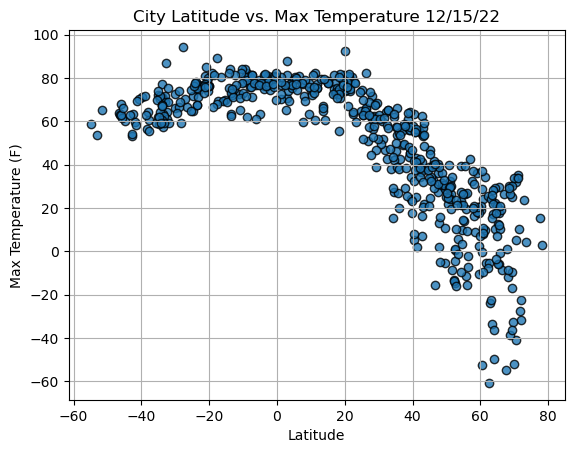

In [72]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

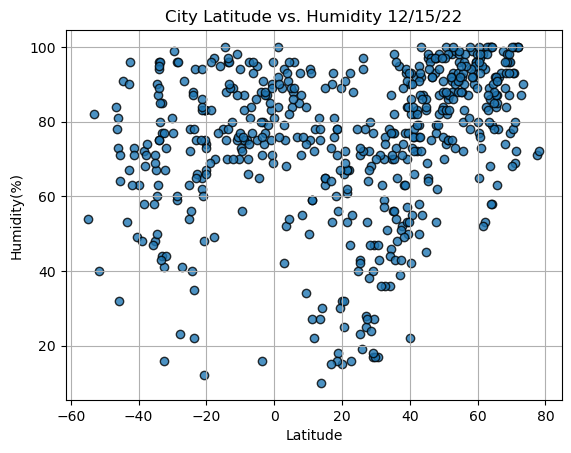

In [81]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(lats, humidity,
           edgecolor="black",
            linewidth=1,
            marker="o",
            alpha=0.8,
            label="Cities")
# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity " + time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

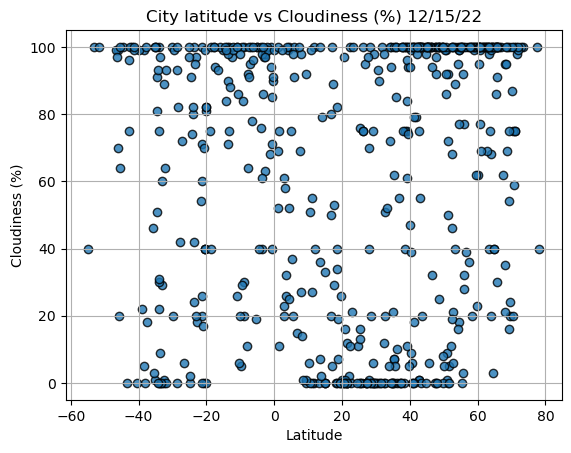

In [83]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats, cloudiness,
             edgecolor="black",
             linewidths=1,
             alpha=0.8,
             marker="o",
             label="Cities")
# Incorporate the other graph properties.
plt.title(f"City latitude vs Cloudiness (%) " + time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/fig3.png")
# Show plot:
plt.show

--------------------------------------------------------------------------------------------------------------

<function matplotlib.pyplot.show(close=None, block=None)>

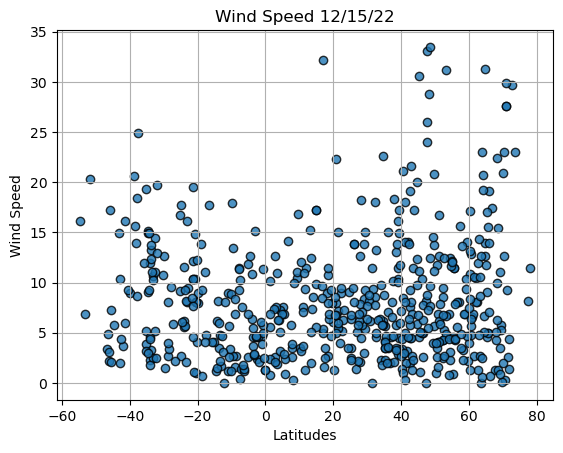

In [91]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats, wind_speed,
            edgecolor="black",
            linewidths=1,
            alpha=0.8,
            marker="o",
            label="Cities")
# Incorporate the other graph properties. 
plt.title("Wind Speed " + time.strftime("%x")),
plt.xlabel("Latitudes"),
plt.ylabel("Wind Speed"),
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/fig4.png")
# Show plot.
plt.show

----------------------------------------------------------------------------------------------

In [150]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [96]:
index13 = city_data_df.loc[13]
index13

City                       Barrow
Country                        US
Date          2022-12-15 21:52:30
Lat                       71.2906
Lng                     -156.7887
Max Temp                    10.42
Humidity                       72
Cloudiness                    100
Wind Speed                   9.22
Name: 13, dtype: object

In [97]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

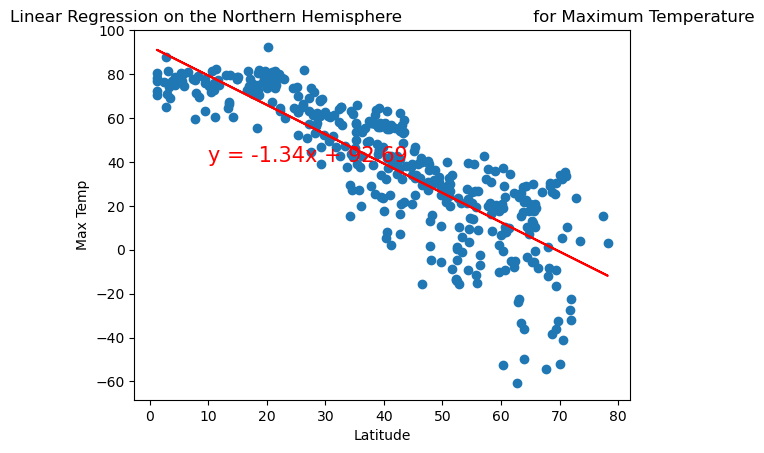

In [100]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

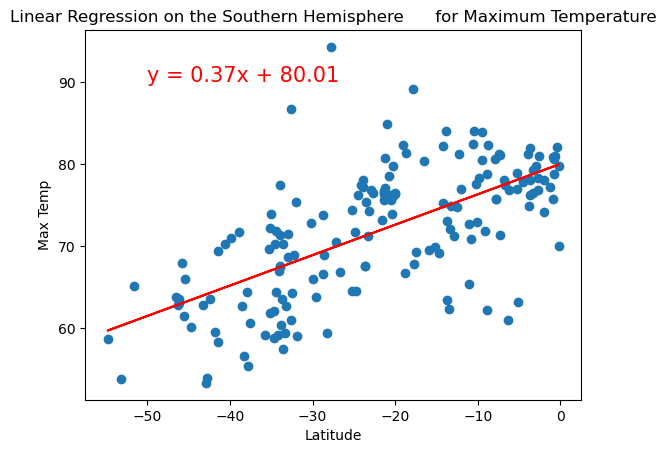

In [109]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
     for Maximum Temperature', 'Max Temp',(-50,90))

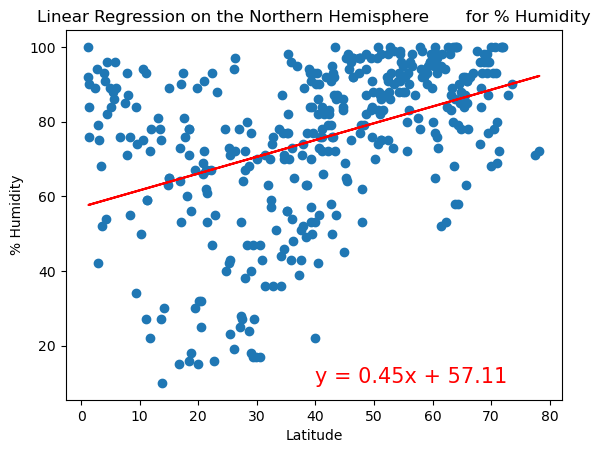

In [108]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
      for % Humidity', '% Humidity',(40,10))

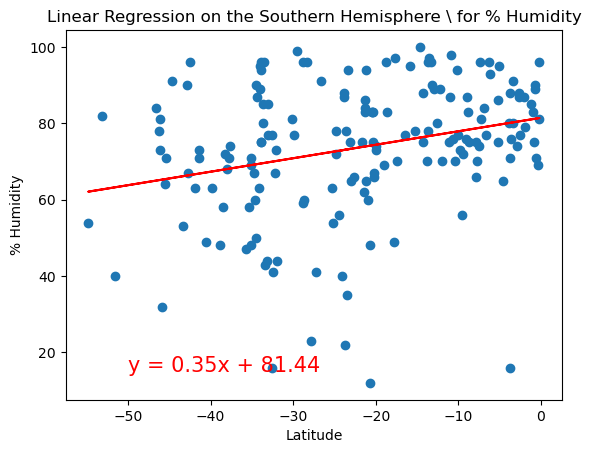

In [125]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \ for % Humidity', '% Humidity',(-50,15))

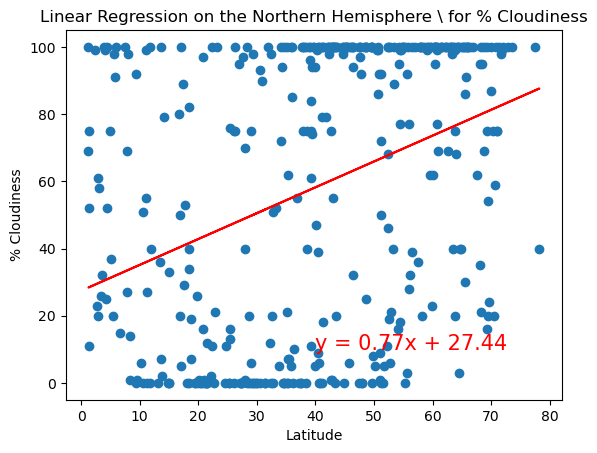

In [123]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \ for % Cloudiness', '% Cloudiness',(40,10))

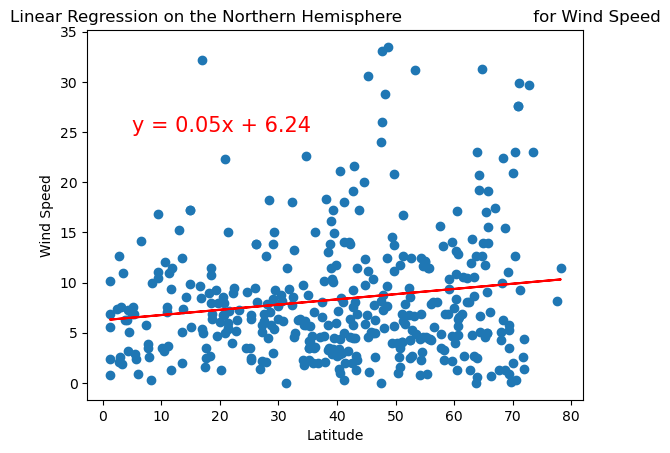

In [140]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(5,25))

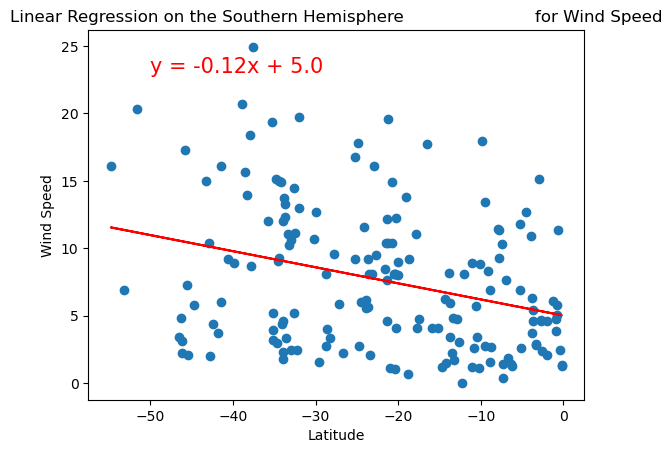

In [148]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,23))

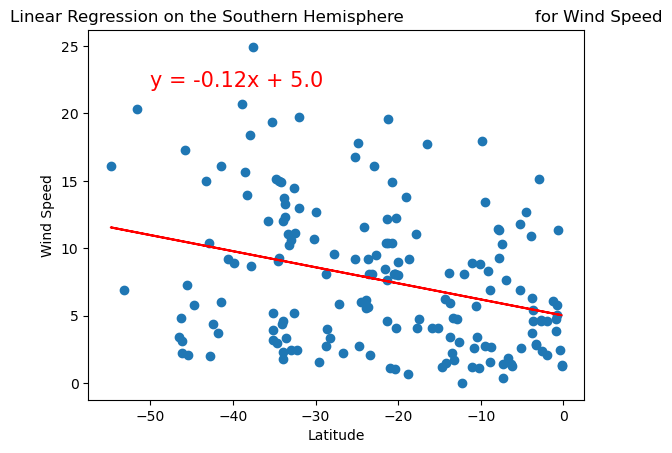

In [152]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,22))